<a href="https://colab.research.google.com/github/mabittar/Portfolio/blob/master/Risco_Inadimpl%C3%AAncia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Avaliação de Risco de Crédito

Com a crise econômica gerada pela pandemia de covid-19, até os grandes bancos brasileiros reforçaram provisões para o caso de calote de clientes, o que influenciou diretamente no lucro destas instituições. 

<center><img alt="real desvalorizado" src="https://thumbs.dreamstime.com/b/c%C3%A9dula-de-derretimento-real-brasileira-do-gotejamento-42780741.jpg" width="50%"> </center>


Sempre que um credor concede crédito a um devedor, há uma chance de que o valor do empréstimo não seja reembolsado. A medida que analisa essa probabilidade é o risco de default. O risco de inadimplência não se aplica apenas a indivíduos que tomam dinheiro emprestado, mas também a empresas que emitem títulos e, devido a restrições financeiras, não podem pagar os juros desses títulos. Sempre que um credor concede crédito, o cálculo do risco de inadimplência de um tomador é crucial como parte de sua estratégia de gerenciamento de risco. Sempre que um investidor está avaliando um investimento, determinar a saúde financeira de uma empresa é crucial para avaliar o risco do investimento.

<center><img alt="Default Risk" src="https://dr5dymrsxhdzh.cloudfront.net/blog/images/ad3043327/2019/05/double-explosure-with-businesss-charts-of-graph-and-rows-of-coins-for-picture-id1051617040.jpg"></center>

Com o rápido aumento na disponibilidade de dados e na capacidade de computação, a área de Machine Learning agora desempenha um papel vital no setor financeiro. Modelos de Machine Learning estão contribuindo significativamente para modelagem de risco de crédito. Grandes bancos e Fintechs têm apostado cada vez mais em modelos de Machine Learning para previnir a inadimplência de alguns clientes.

Neste notebook iremos verificar como um modelo de Machine Learning pode oferecer taxas de precisão significativas na identificação de um cliente que possivelmente não conseguirá cumprir com as suas obrigações.





 
O mercado financeiro tem apostado cada vez mais em modelos de *Machine Learning* para previnir a inadimplência de alguns clientes.

Dentre as principais instituições financeira, o [Nubank](https://nubank.com.br/sobre-nos) é uma das que mais tem se destacado no uso de Inteligência Artificial e times de *Data Science*.

O conjunto de dados a ser utilizado neste Projeto de *Data Science* parte de uma competição realizada pela Startup [Nubank](https://nubank.com.br/sobre-nos) a fim de revelar talentos e potenciais contratações pela Fintech.

## Contextualização do Problema

Neste problema, o objetivo é prever qual a probabilidade de um cliente da Startup Nubank não coumprir com suas obrigações financeiras e deixar de pagar a sua fatura do Cartão de Crédito.

<p align=center>
<img src="http://sigmoidal.ai/wp-content/uploads/2019/10/Nubank_logo.png" width="90px"></p>
  
Vale ressaltar que essa avaliação deve ser realizada no momento em que o cliente solicita o cartão (normalmente no primeiro contato com a instituição).



> OBJETIVO: Criar um modelo que forneça a probabilidade de um cliente virar inadimplente.


Espera-se que um modelo seja capaz de minimizar as perdas financeiras do Nubank, porém minimizando também os falsos positivos.

## Importando os Dados

Os dados utilizados nesta análise estão disponíveis para download por meio [deste link](http://dl.dropboxusercontent.com/s/xn2a4kzf0zer0xu/acquisition_train.csv?dl=0). Consiste basicamente em um arquivo `csv` contendo 45.000 entradas e 43 colunas.

Este arquivo será importando para uma estrutura *DataFrame* utilizando a biblioteca `pandas` a fim de possibilitar sua manipulação e análise.

In [1]:
#importando bibliotecas iniciais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#definindo padrão para o Seaborn
sns.set_style()


In [2]:
link = "http://dl.dropboxusercontent.com/s/xn2a4kzf0zer0xu/acquisition_train.csv?dl=0"
df = pd.read_csv(link)

## Análise Exploratória dos Dados

Agora com os nossos dados importados para o notebook, vamos inspecioná-lo verificando suas dimensões e estrutura geral dos dados

In [3]:
#dimensões do dataset
print("Entradas ou linhas: {}".format(df.shape[0]))
print("Colunas ou variáveis: {}".format(df.shape[1]))

Entradas ou linhas: 45000
Colunas ou variáveis: 43


Nosso dataset possui 45.000 linhas e 43 variáveis distintas.

No próximo passo vamos observar as 5 primeiras linhas para facilitar a visualização adiante:

In [4]:
df.head()

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,facebook_profile,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65014.12,True,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,18.0,18.0,07:52:34,444,outlook.com,NaN,2,0.0,51.0,leidelaura,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,NaN,39726.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100018.91,False,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,50.0,0.0,0.0,14.0,14.0,02:34:29,346,gmail.com,0.0,1,0.0,17.0,diocezio,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65023.65,NaN,Ygq6MsM98oC8yceExr69Ig==,PjTIDfJsK0DKL9fO7vuW2g==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,10.0,NaN,00:60:02,6,gmail.com,NaN,2,NaN,9.0,veralucia,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,NaN,54591.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,68830.01,False,KET/Pmr6rHp1RJ/P9ymztw==,Cc/kWDLQH3dpHv5HU+pLVA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiE56f...,n+xK9CfX0bCn77lClTWviw==,NaN,1.0,0.0,19.0,19.0,11:20:49,406,spgov.com,NaN,3,NaN,38.0,venice,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.0,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,NaN
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,60011.29,True,xsd3ZdsI3356I3xMxZeiqQ==,i036nmJ7rfxo+3EvCD7Jnw==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,11.0,NaN,13:39:03,240,gmail.com,0.0,2,1.0,46.0,darzisa,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618.0,BR-MT,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,NaN


In [5]:
print(list(df))

['ids', 'target_default', 'score_1', 'score_2', 'score_3', 'score_4', 'score_5', 'score_6', 'risk_rate', 'last_amount_borrowed', 'last_borrowed_in_months', 'credit_limit', 'reason', 'income', 'facebook_profile', 'state', 'zip', 'channel', 'job_name', 'real_state', 'ok_since', 'n_bankruptcies', 'n_defaulted_loans', 'n_accounts', 'n_issues', 'application_time_applied', 'application_time_in_funnel', 'email', 'external_data_provider_credit_checks_last_2_year', 'external_data_provider_credit_checks_last_month', 'external_data_provider_credit_checks_last_year', 'external_data_provider_email_seen_before', 'external_data_provider_first_name', 'external_data_provider_fraud_score', 'lat_lon', 'marketing_channel', 'profile_phone_number', 'reported_income', 'shipping_state', 'shipping_zip_code', 'profile_tags', 'user_agent', 'target_fraud']


### Observações iniciais

- A coluna `ids` é anônima e representa o identificador único do cliente. Normalmente essa coluna não influência no modelo de machine learning.

- A coluna `target_default`é o nosso **alvo**. Essa coluna representa no dataset se o cliente cumpriu ou não com as obrigações junto a instituição financeira.

- As colunas `score_1` e `score_2` estão codificadas de alguma forma.  As colunas `score_3`, `score_4`, `score_5` e `score_6` são numéricas. Essas variáveis classificam o cliente quanto a pontuação de crédito e iremos verificar a quantidade de códigos para analisar a sua transformação para categorias.

- existem outras variáveis que apresentam algum tipo de codificação, como ['reason', 'state', 'zip', 'channel', 'job_name', 'real_state'] que estão codificadas e também precisarão de alguma análise mais aprofundada para saber se é possível extrair alguma informação das mesmas.

- A coluna `lat_lon` está em formato string contendo uma tupla com as coordenadas. A coluna `shipping_zip_code` é referente ao CEP do canal de comunicação indicado pelo cliente, assim como a coluna `zip` provavelmente representa o CEP do imóvel onde o empréstimo foi realizado.

- As colunas `last_amount_borrowed`, `last_borrowed_in_months`, `credit_limit` indicam a existência de empréstimos, quando o último empréstimo foi realizado e o limite de crédito para o cliente.


In [6]:
#vamos verificar o resumo estatístico
df.describe()

,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,shipping_zip_code
count,44438.000000,45000.000000,45000.000000,45000.000000,44438.000000,15044.000000,15044.000000,31200.000000,4.443800e+04,18455.000000,44303.000000,44426.000000,44438.000000,33456.000000,45000.000000,22372.0,45000.000000,29876.000000,42767.000000,45000.000000,45000.00,45000.000000
mean,347.983258,100.006797,0.500037,99.925228,0.296717,13782.341991,41.763893,34381.951154,7.160739e+04,35.069737,0.076270,0.004569,10.696701,11.068119,247.537000,0.0,1.501067,0.503381,12.534781,500.399800,inf,33923.514844
std,110.429165,3.178080,0.288326,10.016549,0.101933,8077.571933,10.252705,36586.982218,5.185897e+04,21.663194,0.274052,0.079400,4.592463,4.595501,146.118398,0.0,1.114941,0.499997,126.530487,287.968873,NaN,12692.406382
min,0.000000,86.191572,0.000035,60.663039,0.000000,1005.180000,36.000000,0.000000,4.821180e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-999.000000,0.000000,403.00,12001.000000
25%,270.000000,97.867036,0.252150,93.198353,0.220000,7519.502500,36.000000,10000.000000,4.501078e+04,17.000000,0.000000,0.000000,7.000000,8.000000,120.000000,0.0,1.000000,0.000000,11.000000,252.000000,50948.25,22937.000000
50%,340.000000,100.018900,0.500753,99.974796,0.290000,12023.465000,36.000000,25647.000000,6.126676e+04,32.000000,0.000000,0.000000,10.000000,10.000000,248.000000,0.0,2.000000,1.000000,27.000000,503.000000,101779.00,33896.000000
75%,420.000000,102.141797,0.748816,106.640275,0.360000,19220.270000,36.000000,47086.750000,8.601923e+04,50.000000,0.000000,0.000000,13.000000,14.000000,375.000000,0.0,2.000000,1.000000,43.000000,747.000000,151337.25,44910.000000
max,990.000000,113.978234,0.999973,142.192400,0.900000,35059.600000,60.000000,448269.000000,5.000028e+06,141.000000,5.000000,5.000000,49.000000,49.000000,500.000000,0.0,3.000000,1.000000,59.000000,1000.000000,inf,56000.000000


Do resumo estatístico podemos observar que:

- A coluna `external_data_provider_credit_checks_last_2_year` possui praticamente metade dos valores ausentes e valores máximo, mínimos e desvio padrão igual a 0 (zero), portanto não será útil nas avaliações.

- A coluna `external_data_provider_email_seen_before` possui um valor -999 e irá distorcer as análises futuras.

- A coluna `reported_income` possui valores infinitos, pelo rótulo da coluna podemos inferir que representa os valores informados de recebevíveis do cliente. Podemos substituir esse outlier pela mediana dos valores.

No próximo passo iremos verificar o tipo das variáveis que compõe o Dataset para separarmos as variáveis categóricas:

In [7]:
df.dtypes

ids                                                  object
target_default                                       object
score_1                                              object
score_2                                              object
score_3                                             float64
score_4                                             float64
score_5                                             float64
score_6                                             float64
risk_rate                                           float64
last_amount_borrowed                                float64
last_borrowed_in_months                             float64
credit_limit                                        float64
reason                                               object
income                                              float64
facebook_profile                                     object
state                                                object
zip                                     

Outra análise importante é verificarmos a ausência de dados:

In [8]:
#valores ausentes
print((df.isnull().sum() / df.shape[0]).sort_values(ascending=False))

target_fraud                                        0.966178
last_amount_borrowed                                0.665689
last_borrowed_in_months                             0.665689
ok_since                                            0.589889
external_data_provider_credit_checks_last_2_year    0.502844
external_data_provider_credit_checks_last_year      0.336089
credit_limit                                        0.306667
n_issues                                            0.256533
facebook_profile                                    0.099067
marketing_channel                                   0.079511
job_name                                            0.074133
target_default                                      0.072422
external_data_provider_email_seen_before            0.049622
lat_lon                                             0.030289
user_agent                                          0.016044
n_bankruptcies                                      0.015489
n_defaulted_loans       

Em relação à porcentagem de valores ausentes identificados neste dataset:

Diversas variáveis como `['target_fraud', 'last_amount_borrowed', 'last_borrowed_in_months', 'ok_since', 'external_data_provider_credit_checks_last_2_year']` possuem mais da metade dos valores ausentes.

As variáves ['external_data_provider_credit_checks_last_year', 'credit_limit', 'n_issues'] possuem entre 25-34% do seus valores ausentes.

A variável alvo `target_default` contém valores nulos que serão eliminados do dataset.

Neste projeto, o caso mais extremo `target_fraud` não representa um problema, pois é uma variável alvo que não interessa para a análise de risco de inadimplência. A mesma possui praticamente 97% dos dados ausentes. Já as demais features deverão ser usadas com o devido cuidado.

Uma outra análise interessante de se fazer diz respeito à contagem de valore únicos por features. Muitas vezes, variáveis numéricas podem esconder classes/categorias que melhor representariam uma feature, ou revelar uma quantidade elevada de classes para "variáveis categóricas".

In [9]:
#valores únicos
print (df.nunique().sort_values())

external_data_provider_credit_checks_last_2_year        1
channel                                                 1
target_fraud                                            2
target_default                                          2
external_data_provider_credit_checks_last_year          2
facebook_profile                                        2
last_borrowed_in_months                                 2
external_data_provider_credit_checks_last_month         4
n_defaulted_loans                                       5
real_state                                              5
email                                                   6
n_bankruptcies                                          6
score_1                                                 7
marketing_channel                                       9
shipping_state                                         25
score_2                                                35
n_issues                                               44
n_accounts    

Novamente em relação a variável `external_data_provider_credit_checks_last_2_year` há algum distorção em relação aos dados fornecidos. Nessa etapa foi possível observar também que a coluna `channel` possui apenas um valor. Como não há maiores informações sobre estes dados iremos excluir as duas colunas para que não interfiram nas próximas etapas.

Também é possível observar que a coluna `profile_phone_number` possui 45.000 entradas únicas e provavelmente não irá trazer nenhuma contribuição relevante ao modelo.

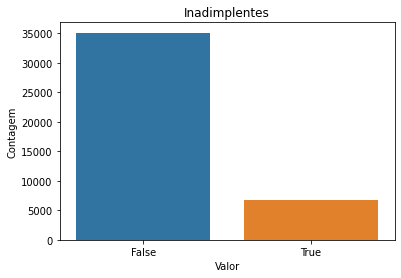

In [10]:
#Proporção de inadimplentes
fig, ax = plt.subplots()
sns.countplot(x='target_default', data=df, ax=ax)
ax.set_title("Inadimplentes")
ax.set_xlabel("Valor")
ax.set_ylabel("Contagem")
plt.show()

In [11]:
# balanceamento das classes
print(df.target_default.value_counts());
print("\n True representam {:.2f}% do dataset.".format((df[df.target_default == True].shape[0] / df.shape[0]) * 100))

False    35080
True      6661
Name: target_default, dtype: int64

 True representam 14.80% do dataset.


### Preparação dos Dados

Na etapa anteior pudemos observar algmas características dos dados disponíveis, agora iremos prosseguir com o tratamento e limpeza dos dados.

In [12]:
#cópia de segurança
df_clean = df.copy()

In [13]:
# drop das colunas
limpeza = ['ids', 'target_fraud', 'external_data_provider_credit_checks_last_2_year', 'channel']
df_clean.drop(labels=limpeza, axis=1, inplace=True )


In [14]:
#substituição dos valores infinitos
df_clean['reported_income'] = df_clean['reported_income'].replace(np.inf, np.nan)

In [15]:
# substituição do -999
df_clean.loc[df_clean['external_data_provider_email_seen_before'] == -999, 'external_data_provider_email_seen_before']=np.nan

In [16]:
# elminar colunas sem informação aparente ou que demandam mais pesquisa
# mantido a categoria ZIP
drop_var = ['reason', 'job_name', 'external_data_provider_first_name',
            'lat_lon', 'shipping_zip_code', 'user_agent', 'profile_tags',
            'application_time_applied', 'email', 'marketing_channel',
            'profile_phone_number', 'shipping_state']
df_clean.drop(labels=drop_var, axis=1, inplace=True)

In [17]:
#Eliminar entradas NaN no vetor alvo
df_clean.dropna(subset=['target_default'], inplace=True)

Apesar de não haver maiores informações sobre as *features*, podemos assumir como premissa que muitos valores são nulos devido a dois fatores:

1. Há alguns itens que não são obrigatórios durante a etapa de preenchimento dos formulários, como a informação sobre o perfil do cliente no Facebook; e
2. Não existe observação alguma referente à coluna, como é caso das colunas `['last_amount_borrowed', 'last_borrowed_in_months', 'n_issues']`.

De maneira geral, para as variáveis que se enquadram no segundo caso, os valores NaN serão substituidos por zero. Para as variáveis numéricas, será adotado o valor da mediana, e para as categóricas o valor mais frequente.

In [18]:
from sklearn.impute import SimpleImputer

num_df = df_clean.select_dtypes(exclude='object').columns
cat_df = df_clean.select_dtypes(include='object').columns

#substituindo valores ausentes
df_clean.last_amount_borrowed.fillna(value=0, inplace=True)
df_clean.last_borrowed_in_months.fillna(value=0, inplace=True)
df_clean.n_issues.fillna(value=0, inplace=True)

In [19]:
# variáveis numéricas
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(df_clean.loc[:,num_df])
df_clean.loc[:,num_df] = imputer.transform(df_clean.loc[:,num_df])


In [20]:
#variáveis categóricas
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(df_clean.loc[:,cat_df])
df_clean.loc[:,cat_df] = imputer.transform(df_clean.loc[:,cat_df])

Vamos verificar se todas as variáveis foram preenchidas corretamente:

In [21]:
df_clean.isnull().sum()

target_default                                     0
score_1                                            0
score_2                                            0
score_3                                            0
score_4                                            0
score_5                                            0
score_6                                            0
risk_rate                                          0
last_amount_borrowed                               0
last_borrowed_in_months                            0
credit_limit                                       0
income                                             0
facebook_profile                                   0
state                                              0
zip                                                0
real_state                                         0
ok_since                                           0
n_bankruptcies                                     0
n_defaulted_loans                             

## Divisão dos dados

Antes de normalizar e padronizar iremos divdir os dados entre treino e teste.

In [23]:
#1. Dividindo entre teste e treino
from sklearn.model_selection import train_test_split

# separar as variáveis independentes da variável alvo
X = df_clean.drop('target_default', axis=1).select_dtypes(exclude='object')
y = df_clean['target_default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Normalização dos dados

O próximo passo na preparação dos dados é realizar o `scaling`, ou seja, normalizar os dados

In [36]:
from sklearn.preprocessing import StandardScaler

scaler_train_df = X_train.copy()
scaler_test_df = X_test.copy()
#normalizar apenas as colunas numéricas
numericas = scaler_train_df.select_dtypes(exclude='object').columns

scaler_train_df[numericas] = StandardScaler().fit_transform(scaler_train_df[numericas].values)
scaler_test_df[numericas] = StandardScaler().fit_transform(scaler_test_df[numericas].values)

### Categorização dos dados

No próximo passo iremos realizar o encoder dos dados

In [38]:
#Ecoding o dataset
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

#criando uma cópia do dataset
encoded_train_df = scaler_train_df.copy()
encoded_test_df = scaler_test_df.copy()

# extrair as colunas categóricas
categorias = encoded_train_df.select_dtypes('object').columns

#armazenando o dicionário de dados
label_dict = defaultdict(LabelEncoder)

#fit do enconder
label = LabelEncoder()

#aplicando o encoder nas colunas categóricas
encoded_train_df = encoded_train_df.apply(lambda i: label_dict[i.name].fit_transform(i))
encoded_test_df = encoded_test_df.apply(lambda i: label_dict[i.name].fit_transform(i))


In [31]:
encoded_train_df.head()

,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,facebook_profile,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income
35310,32,16012,27140,2185,27,1289,1,5488,5124,1,17,0,0,10,0,152,3,1,38,695,17896
26611,36,16702,14704,15746,34,0,0,0,5354,0,46,1,0,9,9,441,1,0,28,598,6060
44157,15,21899,25094,3506,7,898,1,5488,8424,0,32,0,0,5,0,60,0,0,48,580,18703
19607,25,24847,20926,5414,22,7894,1,5488,26618,0,32,0,0,7,7,329,3,1,51,480,26746
14874,42,10340,24800,30761,46,10858,2,15210,28220,0,32,0,0,18,18,377,1,1,40,834,8522


Com mais esse passo executado todos os dados categóricos do nosso dataset foram convertidos para números.

Podemos checar o nosso dicionário de valores para as categorias que foram convertidas:

In [32]:
label_dict

defaultdict(sklearn.preprocessing._label.LabelEncoder,
            {'application_time_in_funnel': LabelEncoder(),
             'credit_limit': LabelEncoder(),
             'external_data_provider_credit_checks_last_month': LabelEncoder(),
             'external_data_provider_credit_checks_last_year': LabelEncoder(),
             'external_data_provider_email_seen_before': LabelEncoder(),
             'external_data_provider_fraud_score': LabelEncoder(),
             'facebook_profile': LabelEncoder(),
             'income': LabelEncoder(),
             'last_amount_borrowed': LabelEncoder(),
             'last_borrowed_in_months': LabelEncoder(),
             'n_accounts': LabelEncoder(),
             'n_bankruptcies': LabelEncoder(),
             'n_defaulted_loans': LabelEncoder(),
             'n_issues': LabelEncoder(),
             'ok_since': LabelEncoder(),
             'reported_income': LabelEncoder(),
             'risk_rate': LabelEncoder(),
             'score_3': LabelEnco

## Ensemble

Por que usar apenas um modelo de machine learning, por que apenas uma forma de fazer previsão? Imagine que você poderia aproveitar o melhor de cada mundo, usar os pontos fortes de cada estimador e até mesmo combiná-los.

Você entenderá a importância do método de `Ensemble` ao entrar no [universo do Machine Learning](https://sigmoidal.ai/como-salvar-seu-modelo-de-machine-learning/) e ficar perdido com a quantidade de modelos diferentes que temos a disposição. Temos regressão linear, polinomial e logística, gradiente descendente, [XGBoost](https://sigmoidal.ai/xgboost-aprenda-algoritmo-de-machine-learning-em-python/), máquina de vetores de suporte, naive bayes, árvores de decisão, Random Forest, entre outros.

Observe abaixo o resultado do classificador de votação para os diferentes modelos. No caso, o VotingClassifier fez a combinação dos modelos.

A documentação original sobre a metodologia pode ser consultada neste [link](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html).

In [43]:
#importando bibliotecas necessárias
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score


#2. Instanciando os modelos
model_xgbc = XGBClassifier()
model_sgd = SGDClassifier()
model_svc = SVC()
model_dt = DecisionTreeClassifier()
voting_clf = VotingClassifier(estimators=[('xgbc', model_xgbc), ('sgd', model_sgd), ('svc', model_svc), ('dt', model_dt)], voting='hard')

#3. os dados já foram separados anteriormente

#4. Fit do modelo
for model in (model_xgbc, model_sgd, model_svc, model_dt, voting_clf):
  model.fit(encoded_train_df, y_train)

#5. Fazendo previsões em cima do modelo treinado
model = []
accuracy = []
roc_score = []
for clf in (model_xgbc, model_sgd, model_svc, model_dt, voting_clf):
  y_pred = clf.predict(encoded_test_df)
  model.append(clf.__class__.__name__)
  accuracy.append(accuracy_score(y_test,y_pred))

#6. Verificando resultados
col = ['Acurácia']
resultado = pd.DataFrame(data=accuracy, index=model, columns=col)
resultado


,Acurácia
XGBClassifier,0.848605
SGDClassifier,0.218230
SVC,0.848605
DecisionTreeClassifier,0.693496
VotingClassifier,0.848126
